# Table of Contents
### 1. Importing Libraries & Data
### 2. Creating new columns based on certain items purchased
##### 2.1 Creating 'department' column
##### 2.2 Creating a parent subset
##### 2.3 Creating a pet owner subset
##### 2.4 Creating an alcohol consumer subset
##### 2.5 Grouping orders by time of day
### 3. Visualizations
##### 3.1 Age Groups - Bar Graph
##### 3.2 Income Groups - Bar Graph
##### 3.3 Has dependant(s) Groups - Bar Graph
##### 3.4 Region - Bar Graph
##### 3.5 Parent - Bar Graph
##### 3.6 Pet Owner - Bar Graph
##### 3.7 Alcohol Consumer - Bar Graph
### 4. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
##### 4.1 Age Profile
##### 4.2 Income Profile
##### 4.3 Dependant Profile
##### 4.4 Parent Profile
##### 4.5 Pet Owner Profile
##### 4.6 Alcohol Consumer Profile
##### 4.7 Time of Day Profile
### 5. Comparing customer profiles with regions and departments
##### 5.1 Distribution of Income Groups by Region - Stacked Bar
##### 5.2 Distribution of Age Groups by Region - Stacked Bar
##### 5.3 Distribution of Users with Dependants by Region - Stacked Bar
##### 5.4 Distribution of Parents by Region - Stacked Bar
##### 5.5 Distribution of Pet Owners by Region - Stacked Bar
##### 5.6 Distribution of Alcohol Consumers by Region - Stacked Bar
### 6. Comparing department tendencies among different profiles
### 7. Exporting Data

# 1. Importing Libraries & Data

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating Path
path = r'/Users/mattwawner/Documents/8-2022-Instacart Basket Analysis'

In [3]:
# Importing 'opc_clean' as opc_clean#

opc_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opc_clean.pkl'))

# 2. Creating new columns based on certain items purchased

### 2.1 Creating 'department' column

In [5]:
# Importing Department Data 

dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'new_data_dict.csv'), index_col = False)

In [6]:
# Checking the names of the columns

dep.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [7]:
# Creating a data dictionary for department data

zipped = zip(dep['Unnamed: 0'], dep['department'])

In [8]:
data_dict = dict(zipped)

In [9]:
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [10]:
# Adding a department name representing the name for each department_id

opc_clean['department'] = opc_clean['department_id'].map(data_dict)

In [11]:
# Checking to make sure the column was added

opc_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,number_of_dependants,fam_status,income,Region,total_orders,activity_flag,age_group,income_group,dependant_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),snacks
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,1,married,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),meat seafood
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,1,married,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),meat seafood
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,1,married,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),bulk


### 2.2 Creating a parent subset

In [12]:
# Creating a parents subset of customers who have dependants & have purchased baby items

parents = opc_clean.loc[(opc_clean['department']=='babies') 
     & (opc_clean['dependant_flag'] =='Has dependant(s)')]

In [13]:
parents.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,number_of_dependants,fam_status,income,Region,total_orders,activity_flag,age_group,income_group,dependant_flag,department
8279,9356,Swaddlers Size 2 Diapers,56,18,12.1,984114,15954,5,0,20,...,2,married,149863,Midwest,9,Regular-activity customer,Middle-age adult,High-income,Has dependant(s),babies
21729,6042,No More Tangles Leave-in Conditioner,102,18,4.2,2360653,39145,5,0,17,...,1,married,47143,South,20,Regular-activity customer,Young adult,Low-income,Has dependant(s),babies
30579,6224,Simply Clean Fragrance Free Wipes,56,18,12.5,609691,57850,4,0,17,...,2,married,115386,Midwest,17,Regular-activity customer,Middle-age adult,Middle-income,Has dependant(s),babies
39653,8799,1st Foods Sweet Potatoes,92,18,6.4,686213,71296,17,1,8,...,3,married,47104,South,21,Regular-activity customer,Middle-age adult,Low-income,Has dependant(s),babies
39862,24096,Single Grain Oatmeal Cereal,92,18,6.2,686213,71296,17,1,8,...,3,married,47104,South,21,Regular-activity customer,Middle-age adult,Low-income,Has dependant(s),babies


In [14]:
# Creating parent column and giving a '1' to users who have purchased baby products & have dependants and '0' to all other users

opc_clean['parent']=[1 if x=='babies' else 0 for x in
                       opc_clean['department']]

In [15]:
# Grouping pet_owners by user_id

opc_clean['parent'] = opc_clean.groupby(['user_id'])['parent'].transform(np.max)

In [16]:
# Checking to see if the parent column was created

opc_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,fam_status,income,Region,total_orders,activity_flag,age_group,income_group,dependant_flag,department,parent
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,married,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),snacks,0
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,married,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),snacks,0
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,married,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),meat seafood,0
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,married,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),meat seafood,0
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,married,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),bulk,0


In [17]:
# Checking the number of parents

opc_clean['parent'].value_counts(dropna=False)

0    21155035
1     9810651
Name: parent, dtype: int64

### 2.3 Creating a pet owner subset

In [18]:
# Creating a subset of rows with 'pets' in department column

pet_owners = opc_clean.loc[(opc_clean['department']=='pets')]

In [19]:
# Checking pet owner subset

pet_owners.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,fam_status,income,Region,total_orders,activity_flag,age_group,income_group,dependant_flag,department,parent
262,24321,Mini's Flavor Dog Snacks,40,8,8.2,2322397,709,5,1,21,...,married,158302,Northeast,5,Regular-activity customer,Senior,High-income,Has dependant(s),pets,0
315,40403,Fancy Feast Seafood Feast Variety Classic Wet ...,41,8,6.3,1331431,709,3,6,15,...,married,158302,Northeast,5,Regular-activity customer,Senior,High-income,Has dependant(s),pets,0
14144,12793,Canine Cuisine Gourmet Filet Mignon New York S...,40,8,2.6,2719241,23513,17,0,7,...,married,55044,West,22,Regular-activity customer,Middle-age adult,Low-income,Has dependant(s),pets,0
17019,5743,ProActive Health Large Breed Adult Dog Food,40,8,1.1,3162880,29911,4,4,16,...,divorced/widowed,135803,Northeast,5,Regular-activity customer,Senior,High-income,No dependants,pets,0
20931,3939,MarroBone Real Beef Flavor Dog Care & Treats,40,8,6.1,753238,38457,21,3,8,...,married,118718,West,21,Regular-activity customer,Middle-age adult,Middle-income,Has dependant(s),pets,0


In [20]:
# Creating pet_owner column and giving a '1' to users who have purchased pet products and '0' to users who have not

opc_clean['pet_owner']=[1 if x=='pets' else 0 for x in
                       opc_clean['department']]

In [21]:
# Grouping pet_owners by user_id

opc_clean['pet_owner'] = opc_clean.groupby(['user_id'])['pet_owner'].transform(np.max)

In [22]:
opc_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,income,Region,total_orders,activity_flag,age_group,income_group,dependant_flag,department,parent,pet_owner
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),snacks,0,0
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),snacks,0,0
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),meat seafood,0,0
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),meat seafood,0,0
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,49620,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),bulk,0,0


In [23]:
# Checking the number of pet owners

opc_clean['pet_owner'].value_counts(dropna=False)

0    27514216
1     3451470
Name: pet_owner, dtype: int64

### 2.4 Creating an alcohol consumer subset

In [24]:
# Creating a subset of rows with 'alcohol' in department column

alc_consumers = opc_clean.loc[(opc_clean['department']=='alcohol')]

In [25]:
# Creating a column for alcohol purchasers(1) & those who haven't purchased alcohol(0)

opc_clean['alcohol_consumer']=[1 if x=='alcohol' else 0 for x in opc_clean['department']]

In [26]:
opc_clean['alcohol_consumer']=opc_clean.groupby(['user_id'])['alcohol_consumer'].transform(np.max)

In [27]:
opc_clean['alcohol_consumer'].value_counts(dropna=False)

0    28635134
1     2330552
Name: alcohol_consumer, dtype: int64

In [28]:
opc_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,Region,total_orders,activity_flag,age_group,income_group,dependant_flag,department,parent,pet_owner,alcohol_consumer
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),snacks,0,0,0
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),snacks,0,0,0
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),meat seafood,0,0,0
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),meat seafood,0,0,0
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),bulk,0,0,0


### 2.5 Grouping orders by time of day
##### - Early morning - 0:00-5:59
##### - Morning - 6:00-11:59
##### - Afternoon - 12:00-17:59
##### - Night - 18:00-24:00


In [29]:
# Checking size of opc_clean

opc_clean.shape

(30965686, 41)

In [30]:
# Creating a subset of only distinct order_ids

distinct_orders = opc_clean.drop_duplicates(subset = 'order_id').copy()

In [31]:
# Checking to see if duplicates were removed

distinct_orders.shape

(3064375, 41)

In [32]:
# Grouping orders by time of day

distinct_orders.loc[(distinct_orders['order_hour_of_day']>=0) &
               (distinct_orders['order_hour_of_day']<6), 
                'time_of_day'] = 'Early morning'

In [33]:
distinct_orders.loc[(distinct_orders['order_hour_of_day']>=6) &
                   (distinct_orders['order_hour_of_day']<12),
                   'time_of_day'] = 'Morning'

In [34]:
distinct_orders.loc[(distinct_orders['order_hour_of_day']>=12) &
                   (distinct_orders['order_hour_of_day']<18),
                   'time_of_day'] = 'Afternoon'

In [35]:
distinct_orders.loc[(distinct_orders['order_hour_of_day']>=18) &
                   (distinct_orders['order_hour_of_day']<=24),
                   'time_of_day'] = 'Night'

In [36]:
distinct_orders['time_of_day'].value_counts()

Afternoon        1444537
Morning          1022836
Night             540739
Early morning      56263
Name: time_of_day, dtype: int64

# 3. Visualizations

### 3.1 Age Groups - Bar Graph

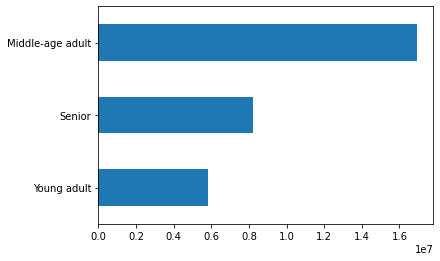

In [37]:
age_bar = opc_clean['age_group'].value_counts().sort_values().plot.barh()

##### The majority of orders come from middle-age adults (30-64), twice as many as the 2 other groups, seniors (65+), and young adults (under 30)

In [81]:
age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_bar.png'))

### 3.2 Income Groups - Bar Graph

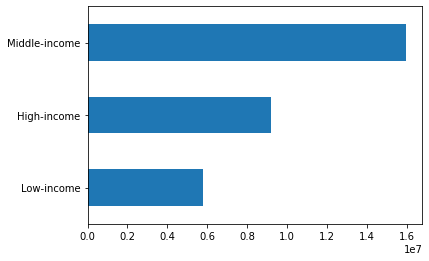

In [38]:
income_bar = opc_clean['income_group'].value_counts().sort_values().plot.barh()

##### It can be seen that the majority of orders are from middle-income customers (60,000-120,000), with high-income customers (120,000+) having the 

### 3.3 Has dependant(s) Groups - Bar Graph

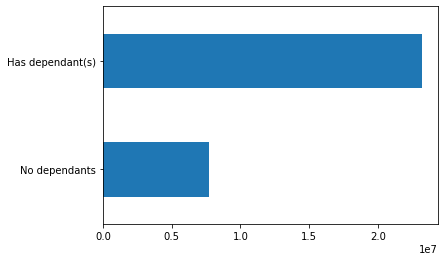

In [39]:
dependant_bar = opc_clean['dependant_flag'].value_counts().sort_values().plot.barh()

##### The majority of orders are from customers who have one or multiple dependants

### 3.4 Region - Bar Graph

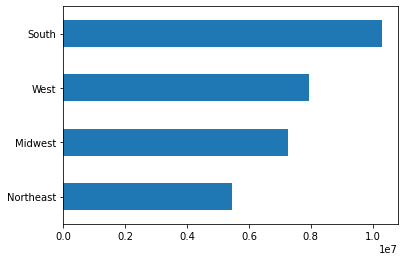

In [40]:
region_bar = opc_clean['Region'].value_counts().sort_values().plot.barh()

##### The majority of customers live in the South region, while the fewest live in the Northeast.

### 3.5 Parent - Bar Graph

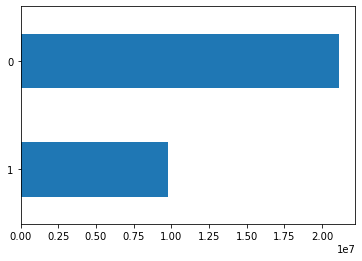

In [41]:
parent_bar = opc_clean['parent'].value_counts().sort_values().plot.barh()

##### Approximately 1/3 of the users have children

### 3.6 Pet Owner - Bar Graph

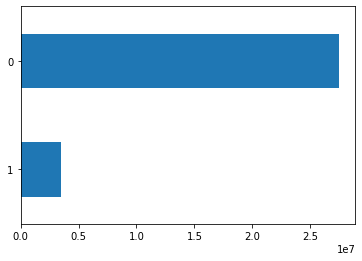

In [42]:
pet_owner_bar = opc_clean['pet_owner'].value_counts().sort_values().plot.barh()

##### The majority of users do not purchase pet products

### 3.7 Alcohol Consumer - Bar Graph

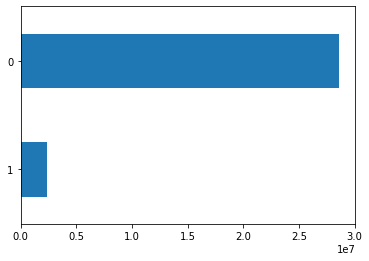

In [43]:
alc_consumer_bar = opc_clean['alcohol_consumer'].value_counts().sort_values().plot.barh()

##### The vast majority of user do not purchase alcohol

### 3.8 Time of Day - Bar Graph

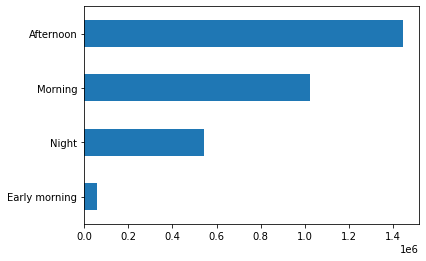

In [44]:
time_of_day_bar = distinct_orders['time_of_day'].value_counts().sort_values().plot.barh()

#### The majority of orders occur in the afternoon, with the morning and night being the next most frequent time periods, respectively. A significantly small portion of orders are placed in the early morning. 

# 4. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

### 4.1 Age Profile

In [45]:
opc_clean.groupby('age_group').agg({'prices':['mean', 'min', 'max']})

prices           
                      mean  min   max
age_group                            
Middle-age adult  7.790474  1.0  25.0
Senior            7.796694  1.0  25.0
Young adult       7.782162  1.0  25.0

#### Middle-age adults and seniors spend almost the same amounts, while young adults spend slightly less.

In [46]:
opc_clean.groupby('age_group').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
age_group                                         
Middle-age adult              10.612932  0.0  30.0
Senior                        10.587780  0.0  30.0
Young adult                   10.610895  0.0  30.0

#### Middle-age adults and young adults order at approximately the same frequency, while seniors order slightly less often.

### 4.2 Income Profile

In [47]:
opc_clean.groupby('income_group').agg({'prices':['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
High-income    7.952086  1.0  25.0
Low-income     7.083489  1.0  25.0
Middle-income  7.954546  1.0  25.0

#### On average, the high-income and middle-income groups purchase around the same priced items, while the low-income group purchases slightly less expensive products on average, by approximately $0.87.

In [48]:
opc_clean.groupby('income_group').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
income_group                                   
High-income                10.559700  0.0  30.0
Low-income                 10.822304  0.0  30.0
Middle-income              10.553867  0.0  30.0

#### It seems that the high & middle-income groups order slightly more often than the low-income group.

### 4.3 Dependant Profile

In [49]:
opc_clean.groupby('dependant_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                      mean  min   max
dependant_flag                       
Has dependant(s)  7.790904  1.0  25.0
No dependants     7.789521  1.0  25.0

#### On average, those who have dependants spend slightly more than those who do not.

In [50]:
opc_clean.groupby('dependant_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
dependant_flag                                    
Has dependant(s)              10.611609  0.0  30.0
No dependants                 10.588737  0.0  30.0

#### User with no dependants order slightly more frequently than those who have dependant(s)

### 4.4 Parent Profile

In [51]:
opc_clean.groupby('parent').agg({'prices':['mean', 'min', 'max']})

prices           
            mean  min   max
parent                     
0       7.770730  1.0  25.0
1       7.833312  1.0  25.0

#### Parents spend slightly more than non-parents per item on average

In [52]:
opc_clean.groupby('parent').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                         mean  min   max
parent                                  
0                   11.228724  0.0  30.0
1                    9.262860  0.0  30.0

#### On average, parents order approximately every 9 days, while non-parents order every 11 days.

### 4.5 Pet Owner Profile

In [53]:
opc_clean.groupby('pet_owner').agg({'prices':['mean', 'min', 'max']})

prices           
               mean  min   max
pet_owner                     
0          7.787906  1.0  25.0
1          7.811707  1.0  25.0

#### Pet owners spend slightly more per item on average compared to non-pet owners.

In [54]:
opc_clean.groupby('pet_owner').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                            mean  min   max
pet_owner                                  
0                      10.677575  0.0  30.0
1                      10.034456  0.0  30.0

#### Pet owners order slightly less frequently than non-pet owners.

### 4.6 Alcohol Consumer Profile

In [55]:
opc_clean.groupby('alcohol_consumer').agg({'prices':['mean', 'min', 'max']})

prices           
                      mean  min   max
alcohol_consumer                     
0                 7.791451  1.0  25.0
1                 7.779582  1.0  25.0

#### Alcohol consumer spend slightly less per item on average compared to non-alcohol consumers.

In [56]:
opc_clean.groupby('alcohol_consumer').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
alcohol_consumer                                  
0                             10.617980  0.0  30.0
1                             10.457377  0.0  30.0

#### Alcohol consumers order slightly less frequently than non-alcohol consumers

### 4.7 Time of Day Profile

In [57]:
distinct_orders.groupby('time_of_day').agg({'prices':['mean', 'min', 'max']})

prices           
                   mean  min   max
time_of_day                       
Afternoon      7.726767  1.0  25.0
Early morning  7.712168  1.0  25.0
Morning        7.694165  1.0  25.0
Night          7.723573  1.0  25.0

#### All of the time periods have a very similar average price per item.

In [58]:
distinct_orders.groupby('time_of_day').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
time_of_day                                    
Afternoon                  10.312783  0.0  30.0
Early morning              10.993015  0.0  30.0
Morning                    10.087384  0.0  30.0
Night                      10.063395  0.0  30.0

#### Users who order in the early morning seem to order less frequently.

# 5. Comparing customer profiles with regions and departments

### 5.1 Distribution of Income Groups by Region - Stacked Bar

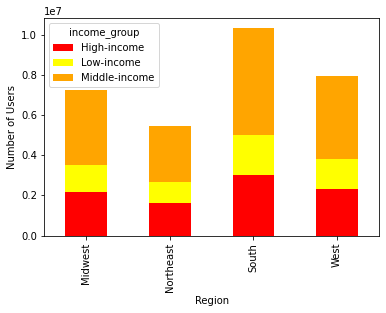

In [59]:
# Comparing the incomes of the users by regions

income_region_sbar = opc_clean.groupby('Region')['income_group'].value_counts().unstack().plot.bar(stacked = True, ylabel = 'Number of Users', color = ['red', 'yellow', 'orange'])
                                                                                                  

### 5.2 Distribution of Age Groups by Region - Stacked Bar

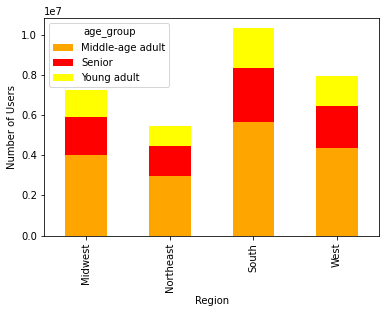

In [60]:
# Comparing the ages of the users by regions

income_region_sbar = opc_clean.groupby('Region')['age_group'].value_counts().unstack().plot.bar(stacked = True, ylabel = 'Number of Users', color = ['orange', 'red', 'yellow'])
                          

### 5.3 Distribution of Users with Dependants by Region - Stacked Bar

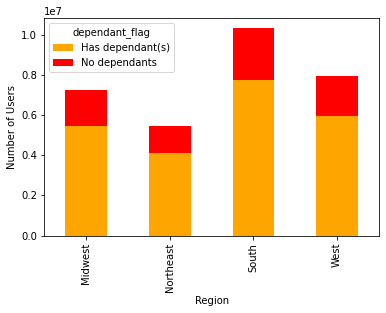

In [61]:
dependant_region_sbar = opc_clean.groupby('Region')['dependant_flag'].value_counts().unstack().plot.bar(stacked = True, ylabel = 'Number of Users', color = ['orange', 'red', 'yellow'])


### 5.4 Distribution of Parents by Region - Stacked Bar

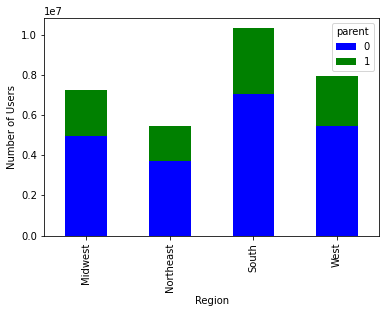

In [62]:
parent_region_sbar = opc_clean.groupby('Region')['parent'].value_counts().unstack().plot.bar(stacked = True, ylabel = 'Number of Users', color = ['blue', 'green'])


### 5.5 Distribution of Pet Owners by Region - Stacked Bar

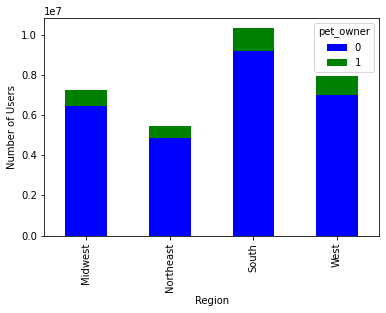

In [63]:
pet_owner_region_sbar = opc_clean.groupby('Region')['pet_owner'].value_counts().unstack().plot.bar(stacked = True, ylabel = 'Number of Users', color = ['blue', 'green'])


### 5.6 Distribution of Alcohol Consumers by Region - Stacked Bar

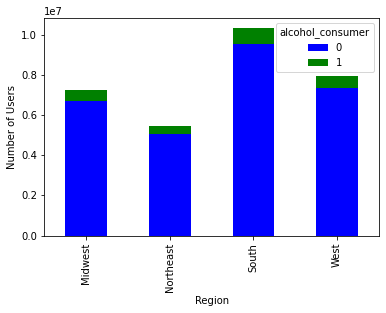

In [64]:
alcohol_consumer_region_sbar = opc_clean.groupby('Region')['alcohol_consumer'].value_counts().unstack().plot.bar(stacked = True, ylabel = 'Number of Users', color = ['blue', 'green'])


### 5.7 Comparing department tendencies among different profiles

In [65]:
# Creating a table showing the frequency of each department for various age groups

age_dept_cross = pd.crosstab(opc_clean['age_group'], opc_clean['department'],normalize='index', dropna = False)

In [66]:
age_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Middle-age adult,0.004720,0.013357,0.036248,0.083189,0.021709,0.001067,0.032586,0.167109,0.032451,0.026483,...,0.022583,0.008256,0.021664,0.002081,0.001098,0.057582,0.013788,0.002937,0.293283,0.089425
Senior,0.004480,0.012958,0.036116,0.083460,0.021416,0.001091,0.032640,0.166923,0.032358,0.026516,...,0.022771,0.008199,0.022103,0.002064,0.001092,0.057637,0.013551,0.003064,0.293821,0.088893
Young adult,0.004803,0.013365,0.036157,0.082102,0.022060,0.001102,0.033031,0.167807,0.032406,0.026795,...,0.022414,0.008393,0.021723,0.002160,0.001178,0.057443,0.013675,0.003122,0.292106,0.089709


In [67]:
# Creating a table showing the frequency of each department for various income groups

income_dept_cross = pd.crosstab(opc_clean['income_group'], opc_clean['department'],normalize='index', dropna = False)

In [68]:
income_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
High-income,0.005091,0.013815,0.037336,0.079549,0.020976,0.000968,0.034209,0.169367,0.032373,0.027616,...,0.022837,0.008427,0.023642,0.002098,0.001123,0.059193,0.013701,0.003251,0.296774,0.077744
Low-income,0.004928,0.009865,0.033108,0.102462,0.025363,0.001258,0.026913,0.155603,0.031928,0.021804,...,0.024438,0.007121,0.014120,0.002029,0.001127,0.052329,0.014030,0.002658,0.264205,0.139389
Middle-income,0.004339,0.014160,0.036662,0.078025,0.020781,0.001080,0.033903,0.170148,0.032620,0.027661,...,0.021798,0.008591,0.023514,0.002110,0.001099,0.058541,0.013587,0.002990,0.301686,0.077825


In [69]:
# Creating a table showing the frequency of each department for dependant_flag groups

dependant_dept_cross = pd.crosstab(opc_clean['dependant_flag'], opc_clean['department'],normalize='index', dropna = False)

In [70]:
dependant_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
dependant_flag,,,,,,,,,,,,,,,,,,,,,
Has dependant(s),0.004642,0.013221,0.036142,0.082950,0.02175,0.001096,0.032768,0.167177,0.032311,0.026602,...,0.022755,0.008246,0.021911,0.002103,0.001106,0.057643,0.013697,0.002991,0.292944,0.089382
No dependants,0.004761,0.013350,0.036356,0.083377,0.02154,0.001034,0.032431,0.167232,0.032737,0.026395,...,0.022139,0.008328,0.021431,0.002059,0.001126,0.057352,0.013724,0.003049,0.293984,0.089204


In [71]:
# Creating a table showing the frequency of each department for parent groups

parent_dept_cross = pd.crosstab(opc_clean['parent'], opc_clean['department'],normalize='index', dropna = False)

In [72]:
parent_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
parent,,,,,,,,,,,,,,,,,,,,,
0,0.005837,0.000000,0.035695,0.090808,0.021777,0.001122,0.032777,0.163166,0.033069,0.025084,...,0.022598,0.008511,0.021888,0.002093,0.001087,0.059416,0.013481,0.003277,0.297267,0.092836
1,0.002160,0.041831,0.037275,0.066341,0.021526,0.000991,0.032482,0.175870,0.031012,0.029710,...,0.022608,0.007741,0.021583,0.002089,0.001163,0.053590,0.014186,0.002420,0.284443,0.081794


In [73]:
# Creating a table showing the frequency of each department for pet owner groups

pet_owner_dept_cross = pd.crosstab(opc_clean['pet_owner'], opc_clean['department'],normalize='index', dropna = False)

In [74]:
pet_owner_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
pet_owner,,,,,,,,,,,,,,,,,,,,,
0,0.004293,0.013623,0.035730,0.081869,0.021722,0.001139,0.032209,0.169114,0.032503,0.026237,...,0.020569,0.008180,0.021633,0.002086,0.001062,0.056948,0.012673,0.000000,0.302013,0.089453
1,0.007695,0.010305,0.039912,0.092526,0.021504,0.000614,0.036467,0.151858,0.031734,0.029041,...,0.038801,0.008958,0.023049,0.002140,0.001505,0.062535,0.021926,0.026962,0.222982,0.088421


In [75]:
# Creating a table showing the frequency of each department for alcohol consumer groups

alc_consumer_dept_cross = pd.crosstab(opc_clean['alcohol_consumer'], opc_clean['department'],normalize='index', dropna = False)

In [76]:
alc_consumer_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
alcohol_consumer,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.013788,0.035444,0.080996,0.021601,0.001152,0.032529,0.168476,0.032823,0.026442,...,0.020842,0.008206,0.021737,0.002165,0.000978,0.056876,0.013435,0.002637,0.302339,0.089027
1,0.062077,0.006686,0.045439,0.108376,0.022881,0.000201,0.034581,0.151401,0.027433,0.027875,...,0.044208,0.009012,0.022458,0.001189,0.002747,0.066097,0.017017,0.007526,0.180971,0.093155


In [77]:
# Creating a table showing the frequency of each department for family status groups

fam_status_dept_cross = pd.crosstab(opc_clean['fam_status'], opc_clean['department'],normalize='index', dropna = False)

In [78]:
fam_status_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
fam_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,0.004490,0.012985,0.036190,0.083496,0.021422,0.001012,0.031855,0.167312,0.032793,0.026556,...,0.022094,0.008246,0.021782,0.001914,0.001074,0.057418,0.013727,0.003034,0.293756,0.089305
living with parents and siblings,0.005658,0.013085,0.036243,0.080412,0.022436,0.001102,0.032728,0.168921,0.032486,0.026696,...,0.022515,0.008367,0.021836,0.002239,0.001225,0.057956,0.013638,0.003604,0.290667,0.088651
married,0.004573,0.013230,0.036136,0.083122,0.021703,0.001095,0.032771,0.167059,0.032299,0.026595,...,0.022771,0.008238,0.021916,0.002093,0.001098,0.057622,0.013701,0.002949,0.293100,0.089432
single,0.004902,0.013539,0.036442,0.083315,0.021601,0.001045,0.032731,0.167190,0.032707,0.026311,...,0.022163,0.008371,0.021249,0.002134,0.001153,0.057318,0.013723,0.003058,0.294102,0.089151


In [82]:
opc_clean.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,Region,total_orders,activity_flag,age_group,income_group,dependant_flag,department,parent,pet_owner,alcohol_consumer
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),snacks,0,0,0
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),snacks,0,0,0
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),meat seafood,0,0,0
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),meat seafood,0,0,0
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Midwest,32,Regular-activity customer,Senior,Low-income,Has dependant(s),bulk,0,0,0


# 6. Exporting Data

In [80]:
# Exporting data
opc_clean.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opc_clean_final.pkl'))